<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_project_6%20notebook-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# DATA IMPORTING

In [9]:
import pandas as pd

df1 = pd.read_csv("/content/store data.csv")
df2 = pd.read_csv("/content/test dataset.csv")
df3 = pd.read_csv("/content/train datasets.csv")

# Here all 3 datasets has been uploaded.

# Preprocess all 3 datasets.

In [10]:
df1.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [11]:
df1['CompetitionDistance'].fillna(df1['CompetitionDistance'].median(), inplace=True)
df1['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df1['CompetitionOpenSinceYear'].fillna(0, inplace=True)
df1['CompetitionOpen'] = ((df1['CompetitionOpenSinceMonth'] > 0) &
                         (df1['CompetitionOpenSinceYear'] > 0)).astype(int)
df1.loc[df1['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear']] = 0
df1.loc[df1['Promo2'] == 0, 'PromoInterval'] = 'None'

In [12]:
df1.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
 10  CompetitionOpen            1115 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 95.9+ KB


In [14]:
cols_to_int = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2SinceWeek', 'Promo2SinceYear']
df1[cols_to_int] = df1[cols_to_int].astype(int)
cat_cols = ['StoreType', 'Assortment', 'PromoInterval']
df1[cat_cols] = df1[cat_cols].astype('category')


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   int64   
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1115 non-null   float64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64   
 5   CompetitionOpenSinceYear   1115 non-null   int64   
 6   Promo2                     1115 non-null   int64   
 7   Promo2SinceWeek            1115 non-null   int64   
 8   Promo2SinceYear            1115 non-null   int64   
 9   PromoInterval              1115 non-null   category
 10  CompetitionOpen            1115 non-null   int64   
dtypes: category(3), float64(1), int64(7)
memory usage: 73.6 KB


In [16]:
df2

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,9/17/2015,1.0,1,0,0
1,2,3,4,9/17/2015,1.0,1,0,0
2,3,7,4,9/17/2015,1.0,1,0,0
3,4,8,4,9/17/2015,1.0,1,0,0
4,5,9,4,9/17/2015,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,8/1/2015,1.0,0,0,0
41084,41085,1112,6,8/1/2015,1.0,0,0,0
41085,41086,1113,6,8/1/2015,1.0,0,0,0
41086,41087,1114,6,8/1/2015,1.0,0,0,0


In [17]:
df2.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [18]:
df2['Open'].fillna(1, inplace=True)

In [19]:
df2.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [22]:
# Convert 'Open' from float to int
df2['Open'] = df2['Open'].astype(int)

# Convert 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Optional: convert 'StateHoliday' to category
df2['StateHoliday'] = df2['StateHoliday'].astype('category')


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  int64         
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  category      
 7   SchoolHoliday  41088 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(6)
memory usage: 2.2 MB


In [24]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1.0,1.0,0,1.0
1,2,5,7/31/2015,6064,625,1.0,1.0,0,1.0
2,3,5,7/31/2015,8314,821,1.0,1.0,0,1.0
3,4,5,7/31/2015,13995,1498,1.0,1.0,0,1.0
4,5,5,7/31/2015,4822,559,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
440323,684,1,6/2/2014,12258,804,1.0,1.0,0,0.0
440324,685,1,6/2/2014,10201,861,1.0,1.0,0,0.0
440325,686,1,6/2/2014,10708,1132,1.0,1.0,0,0.0
440326,687,1,6/2/2014,12738,979,1.0,1.0,0,0.0


In [25]:
df3.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,1
Promo,1
StateHoliday,1
SchoolHoliday,1


In [26]:
df3['SchoolHoliday'].fillna(0, inplace=True)

In [27]:
df3.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,1
Promo,1
StateHoliday,1
SchoolHoliday,0


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440328 entries, 0 to 440327
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          440328 non-null  int64  
 1   DayOfWeek      440328 non-null  int64  
 2   Date           440328 non-null  object 
 3   Sales          440328 non-null  int64  
 4   Customers      440328 non-null  int64  
 5   Open           440327 non-null  float64
 6   Promo          440327 non-null  float64
 7   StateHoliday   440327 non-null  object 
 8   SchoolHoliday  440328 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 30.2+ MB


In [29]:
df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')

# Convert binary columns to nullable integer
binary_cols = ['Open', 'Promo', 'SchoolHoliday']
df3[binary_cols] = df3[binary_cols].astype('Int64')

# Convert 'StateHoliday' to category
df3['StateHoliday'] = df3['StateHoliday'].astype('category')

# Convert 'Sales' and 'Customers' to Int64 if they are whole numbers
if df3['Sales'].dropna().mod(1).eq(0).all():
    df3['Sales'] = df3['Sales'].astype('Int64')

if df3['Customers'].dropna().mod(1).eq(0).all():
    df3['Customers'] = df3['Customers'].astype('Int64')

# Check the updated dtypes
print(df3.dtypes)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     Int64
Customers                 Int64
Open                      Int64
Promo                     Int64
StateHoliday           category
SchoolHoliday             Int64
dtype: object


# Here i merged store dataset with train dataset.

In [30]:
df4 = pd.merge(df3, df1, on='Store', how='left')

In [31]:
df4

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,None,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,None,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440323,684,1,2014-06-02,12258,804,1,1,0,0,d,c,680.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",0
440324,685,1,2014-06-02,10201,861,1,1,0,0,a,a,650.0,11,2013,1,37,2009,"Jan,Apr,Jul,Oct",1
440325,686,1,2014-06-02,10708,1132,1,1,0,0,a,a,20050.0,4,2002,0,0,0,None,1
440326,687,1,2014-06-02,12738,979,1,1,0,0,d,c,2770.0,0,0,0,0,0,None,0


# Here i merged store dataset with test dataset.

In [32]:
df5 =pd.merge(df2, df1, on='Store', how='left')

In [33]:
df5

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,9,2008,0,0,0,None,1
1,2,3,4,2015-09-17,1,1,0,0,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
2,3,7,4,2015-09-17,1,1,0,0,a,c,24000.0,4,2013,0,0,0,None,1
3,4,8,4,2015-09-17,1,1,0,0,a,a,7520.0,10,2014,0,0,0,None,1
4,5,9,4,2015-09-17,1,1,0,0,a,c,2030.0,8,2000,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
41084,41085,1112,6,2015-08-01,1,0,0,0,c,c,1880.0,4,2006,0,0,0,None,1
41085,41086,1113,6,2015-08-01,1,0,0,0,a,c,9260.0,0,0,0,0,0,None,0
41086,41087,1114,6,2015-08-01,1,0,0,0,a,c,870.0,0,0,0,0,0,None,0


# **PREPROCESSING DATASETS DF4**

In [34]:
df4

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,None,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,None,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440323,684,1,2014-06-02,12258,804,1,1,0,0,d,c,680.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",0
440324,685,1,2014-06-02,10201,861,1,1,0,0,a,a,650.0,11,2013,1,37,2009,"Jan,Apr,Jul,Oct",1
440325,686,1,2014-06-02,10708,1132,1,1,0,0,a,a,20050.0,4,2002,0,0,0,None,1
440326,687,1,2014-06-02,12738,979,1,1,0,0,d,c,2770.0,0,0,0,0,0,None,0


In [35]:
df4.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,1
Promo,1
StateHoliday,1
SchoolHoliday,0
StoreType,0


In [36]:
import pandas as pd

# Drop rows with missing 'Date' (can't impute dates meaningfully)
df4 = df4[df4['Date'].notna()].reset_index(drop=True)

# Handle 'Open': assume store was open unless clearly marked closed
df4['Open'] = df4['Open'].fillna(1).astype('Int64')

# Handle 'Promo': assume no promotion if missing
df4['Promo'] = df4['Promo'].fillna(0).astype('Int64')

# Handle 'StateHoliday': assume no holiday if missing
df4['StateHoliday'] = df4['StateHoliday'].fillna('0').astype('category')

# Handle 'Sales': if Open == 0, fill Sales with 0; else use median
median_sales = df4['Sales'].median()
df4['Sales'] = df4.apply(
    lambda row: 0 if row['Open'] == 0 and pd.isna(row['Sales']) else row['Sales'],
    axis=1
)
df4['Sales'] = df4['Sales'].fillna(median_sales).astype('Int64')

# Handle 'Customers': if Open == 0, fill with 0; else use median
median_customers = df4['Customers'].median()
df4['Customers'] = df4.apply(
    lambda row: 0 if row['Open'] == 0 and pd.isna(row['Customers']) else row['Customers'],
    axis=1
)
df4['Customers'] = df4['Customers'].fillna(median_customers).astype('Int64')
df4.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


# all null values has been handled.

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440328 entries, 0 to 440327
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      440328 non-null  int64         
 1   DayOfWeek                  440328 non-null  int64         
 2   Date                       440328 non-null  datetime64[ns]
 3   Sales                      440328 non-null  Int64         
 4   Customers                  440328 non-null  Int64         
 5   Open                       440328 non-null  Int64         
 6   Promo                      440328 non-null  Int64         
 7   StateHoliday               440328 non-null  category      
 8   SchoolHoliday              440328 non-null  Int64         
 9   StoreType                  440328 non-null  category      
 10  Assortment                 440328 non-null  category      
 11  CompetitionDistance        440328 non-null  float64 

In [38]:
df4['Date'] = pd.to_datetime(df4['Date'], errors='coerce')

# Convert binary/flag columns to nullable integer
flag_cols = ['Open', 'Promo', 'Promo2', 'SchoolHoliday', 'CompetitionOpen']
df4[flag_cols] = df4[flag_cols].astype('Int64')

# Convert 'Sales' and 'Customers' to Int64 if all values are whole numbers
if df4['Sales'].dropna().mod(1).eq(0).all():
    df4['Sales'] = df4['Sales'].astype('Int64')

if df4['Customers'].dropna().mod(1).eq(0).all():
    df4['Customers'] = df4['Customers'].astype('Int64')

# Convert 'StateHoliday' to category
df4['StateHoliday'] = df4['StateHoliday'].astype('category')

# Convert remaining date-related columns to nullable Int64 (in case of missing values)
date_related_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
df4[date_related_cols] = df4[date_related_cols].astype('Int64')

# Final check of data types
print(df4.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 Int64
Customers                             Int64
Open                                  Int64
Promo                                 Int64
StateHoliday                       category
SchoolHoliday                         Int64
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth             Int64
CompetitionOpenSinceYear              Int64
Promo2                                Int64
Promo2SinceWeek                       Int64
Promo2SinceYear                       Int64
PromoInterval                      category
CompetitionOpen                       Int64
dtype: object


# Then i correct the wrong dtypes.

In [39]:
# Drop duplicate rows
df4 = df4.drop_duplicates()

# Confirm removal
print(f"New shape after removing duplicates: {df4.shape}")


New shape after removing duplicates: (440328, 19)


# Box plot to check outliers.

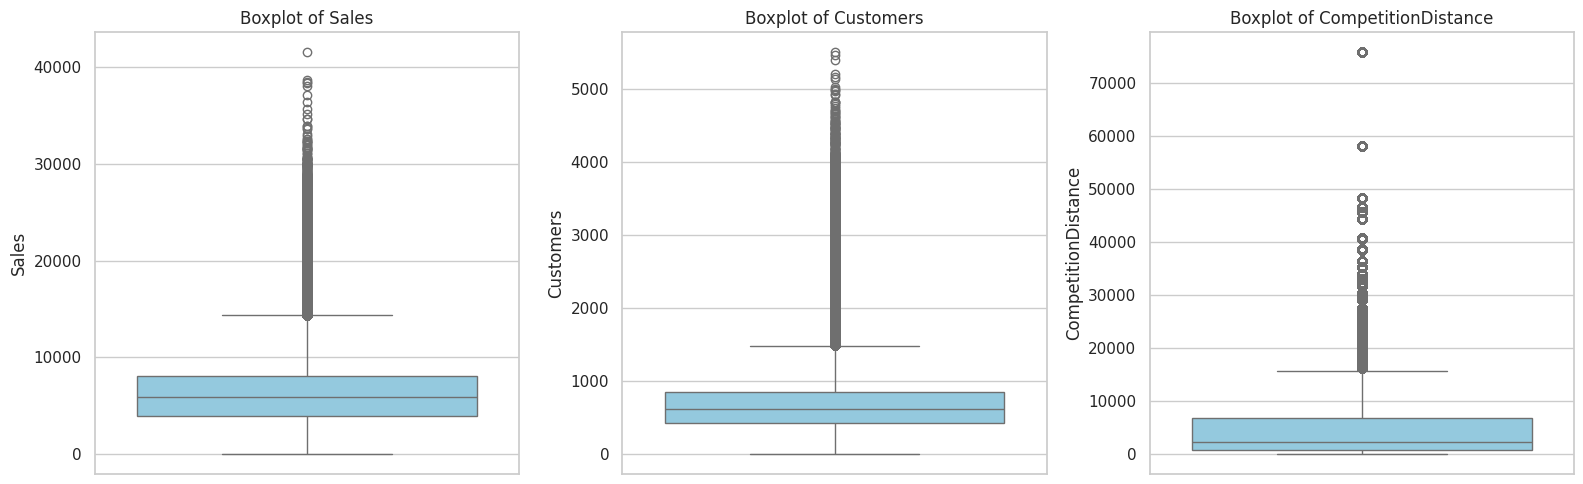

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# List of numeric columns to check
numeric_cols = ['Sales', 'Customers', 'CompetitionDistance']

# Create box plots
plt.figure(figsize=(16, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df4[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [41]:
outlier_cols = ['Sales', 'Customers', 'CompetitionDistance']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df4[(df[column] >= lower_bound) & (df4[column] <= upper_bound)]

# Apply for each column
for col in outlier_cols:
    df4 = remove_outliers_iqr(df4 ,col)

# Show shape before and after
print(f"Original shape: {df4.shape}")
print(f"Shape after outlier removal: {df4.shape}")

Original shape: (380966, 19)
Shape after outlier removal: (380966, 19)


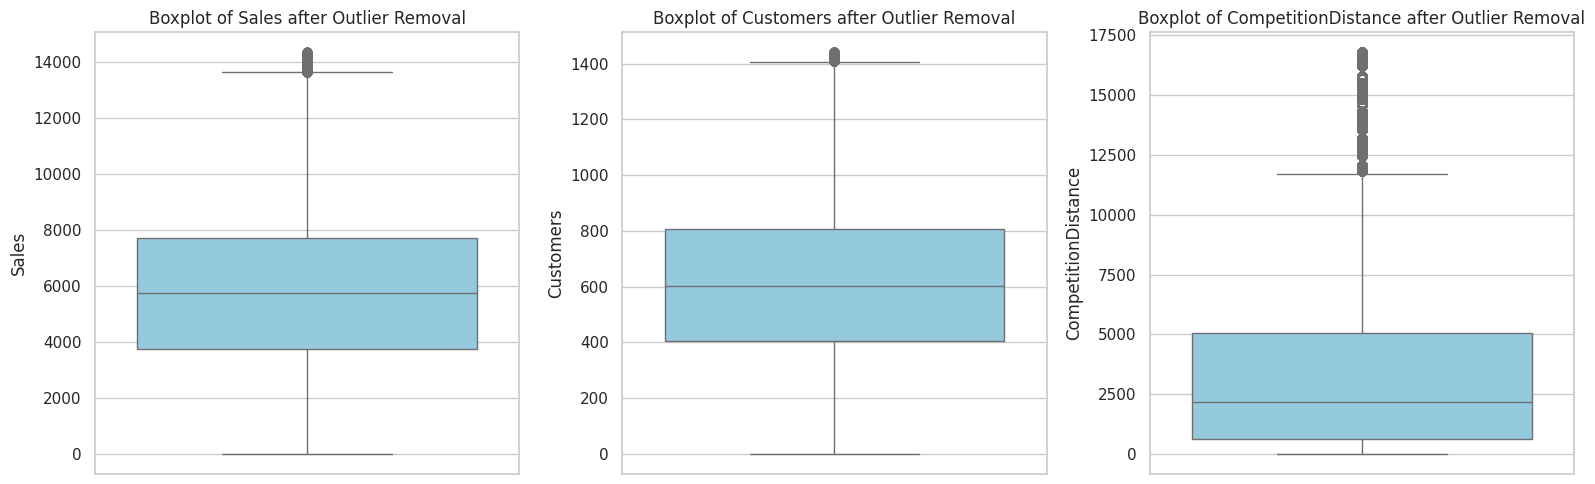

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# List of numeric columns to check
numeric_cols = ['Sales', 'Customers', 'CompetitionDistance']

# Create box plots
plt.figure(figsize=(16, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df4[col], color='skyblue')
    plt.title(f'Boxplot of {col} after Outlier Removal')
    plt.tight_layout()

plt.show()


In [43]:
def get_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Initialize mask to keep only non-outliers
mask = pd.Series(True, index=df4.index)

# Apply mask for all columns
for col in ['Sales', 'Customers', 'CompetitionDistance']:
    lower, upper = get_outlier_bounds(df4, col)
    mask &= (df4[col] >= lower) & (df4[col] <= upper)

# Apply final mask to remove all outliers
df4 = df4[mask]


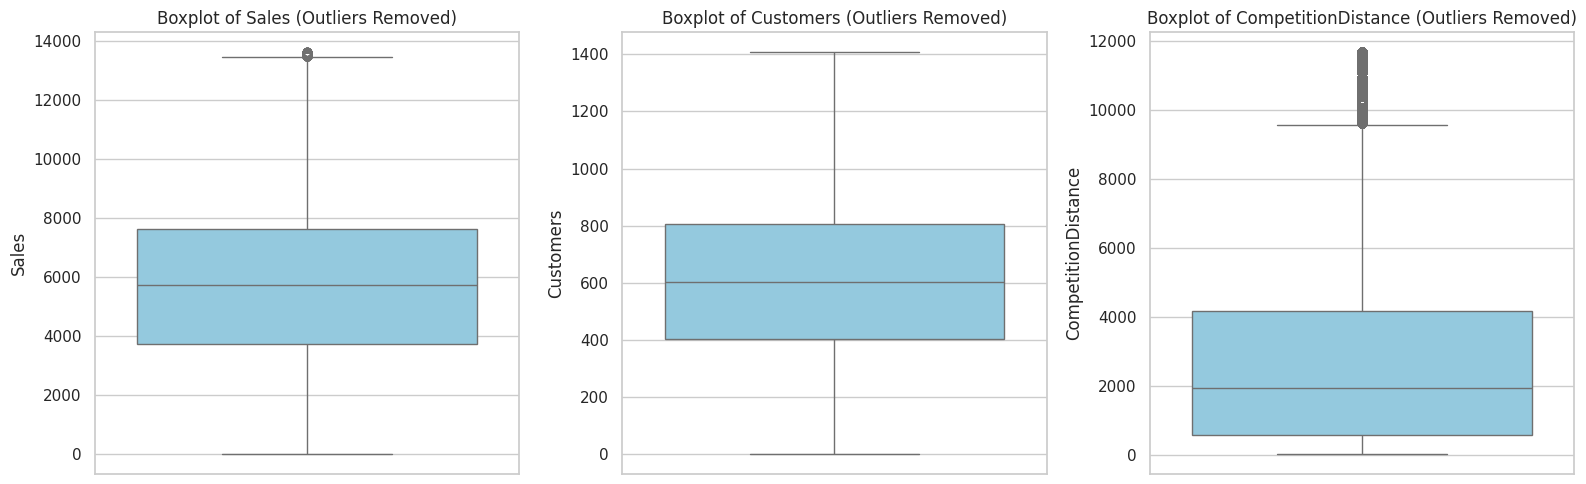

In [44]:
# Plot updated boxplots after correctly removing outliers
plt.figure(figsize=(16, 5))
for i, col in enumerate(['Sales', 'Customers', 'CompetitionDistance']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df4[col], color='skyblue')
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.tight_layout()

plt.show()


In [45]:
def get_outlier_bounds(df4, column, multiplier=1.0):  # lower multiplier = stricter
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

mask = pd.Series(True, index=df4.index)

for col in ['Sales', 'Customers', 'CompetitionDistance']:
    low, high = get_outlier_bounds(df4, col, multiplier=1.0)
    mask &= (df4[col] >= low) & (df4[col] <= high)

df4 = df4[mask]


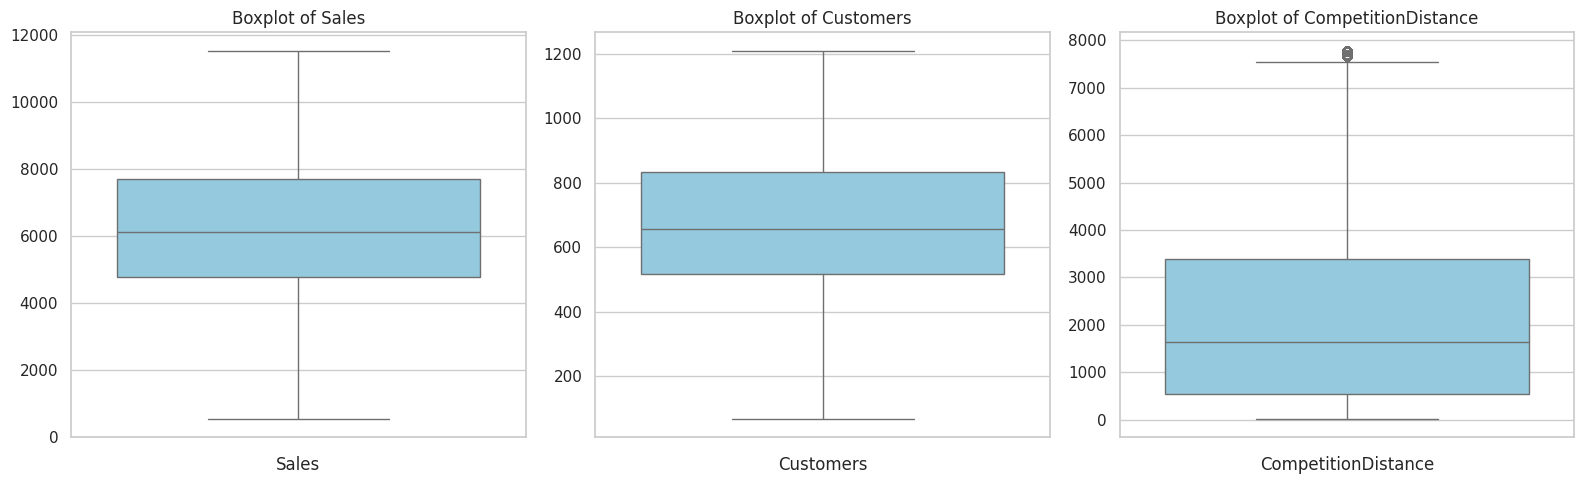

In [46]:
# Set seaborn style
sns.set(style="whitegrid")

# List of numeric columns to plot
numeric_cols = ['Sales', 'Customers', 'CompetitionDistance']

# Create box plots
plt.figure(figsize=(16, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df4[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Now their are no outliers

# Preprocessing dataset df5

In [47]:
df5

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,9,2008,0,0,0,None,1
1,2,3,4,2015-09-17,1,1,0,0,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
2,3,7,4,2015-09-17,1,1,0,0,a,c,24000.0,4,2013,0,0,0,None,1
3,4,8,4,2015-09-17,1,1,0,0,a,a,7520.0,10,2014,0,0,0,None,1
4,5,9,4,2015-09-17,1,1,0,0,a,c,2030.0,8,2000,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
41084,41085,1112,6,2015-08-01,1,0,0,0,c,c,1880.0,4,2006,0,0,0,None,1
41085,41086,1113,6,2015-08-01,1,0,0,0,a,c,9260.0,0,0,0,0,0,None,0
41086,41087,1114,6,2015-08-01,1,0,0,0,a,c,870.0,0,0,0,0,0,None,0


In [48]:
df5.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [49]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  int64         
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  category      
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  category      
 9   Assortment                 41088 non-null  category      
 10  CompetitionDistance        41088 non-null  float64       
 11  CompetitionOpenSinceMonth  41088 non-null  int64         
 12  Comp

In [50]:
# Convert categorical columns
df5['StateHoliday'] = df5['StateHoliday'].astype('category')
df5['StoreType'] = df5['StoreType'].astype('category')
df5['Assortment'] = df5['Assortment'].astype('category')
df5['PromoInterval'] = df5['PromoInterval'].astype('category')
binary_cols = ['SchoolHoliday', 'CompetitionOpen', 'Promo2', 'Open']
for col in binary_cols:
    df5[col] = df5[col].astype('category')
df5['Promo2SinceWeek'] = df5['Promo2SinceWeek'].astype('category')
df5['Promo2SinceYear'] = df5['Promo2SinceYear'].astype('category')
df5['CompetitionOpenSinceMonth'] = df5['CompetitionOpenSinceMonth'].astype('int64')
df5['CompetitionOpenSinceYear'] = df5['CompetitionOpenSinceYear'].astype('int64')
print(df5.dtypes)

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                               category
Promo                                 int64
StateHoliday                       category
SchoolHoliday                      category
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                             category
Promo2SinceWeek                    category
Promo2SinceYear                    category
PromoInterval                      category
CompetitionOpen                    category
dtype: object


In [51]:
df5.drop_duplicates()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,9,2008,0,0,0,None,1
1,2,3,4,2015-09-17,1,1,0,0,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",1
2,3,7,4,2015-09-17,1,1,0,0,a,c,24000.0,4,2013,0,0,0,None,1
3,4,8,4,2015-09-17,1,1,0,0,a,a,7520.0,10,2014,0,0,0,None,1
4,5,9,4,2015-09-17,1,1,0,0,a,c,2030.0,8,2000,0,0,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1
41084,41085,1112,6,2015-08-01,1,0,0,0,c,c,1880.0,4,2006,0,0,0,None,1
41085,41086,1113,6,2015-08-01,1,0,0,0,a,c,9260.0,0,0,0,0,0,None,0
41086,41087,1114,6,2015-08-01,1,0,0,0,a,c,870.0,0,0,0,0,0,None,0


# Outliers detection:

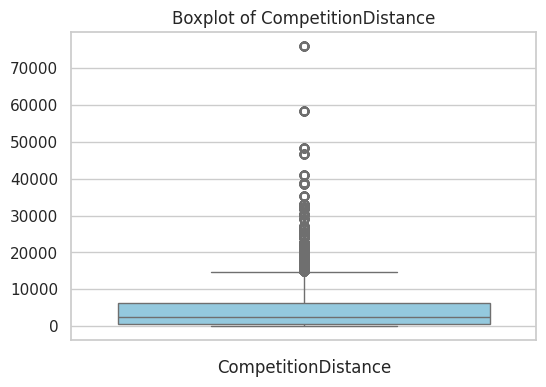

In [52]:
numeric_cols = ['CompetitionDistance']

# Set the seaborn style
sns.set(style="whitegrid")

# Plot box plots
plt.figure(figsize=(6, 4))
for col in numeric_cols:
    sns.boxplot(y=df5[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.xlabel(col)
    plt.show()

In [53]:
import pandas as pd

# Columns to remove outliers from
cols = ['CompetitionDistance']

# Copy original DataFrame
df5_cleaned = df5.copy()

# Apply IQR filtering for each column
for col in cols:
    Q1 = df5_cleaned[col].quantile(0.25)
    Q3 = df5_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df5_cleaned = df5_cleaned[(df5_cleaned[col] >= lower) & (df5_cleaned[col] <= upper)]

# Confirm shape
print("After outlier removal:", df5_cleaned.shape)


After outlier removal: (37296, 18)


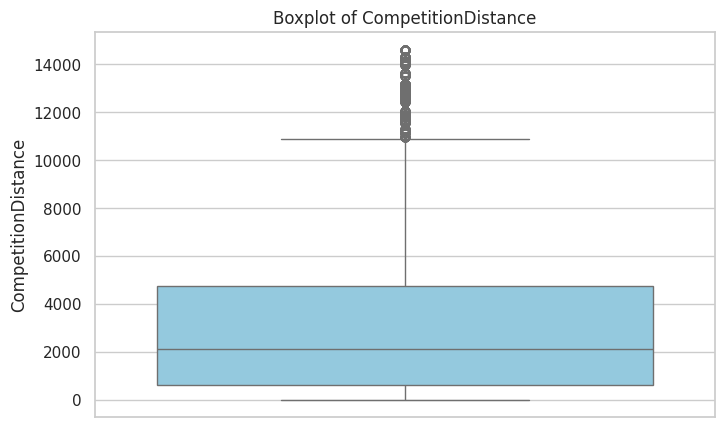

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create boxplot for CompetitionDistance
plt.figure(figsize=(8, 5))
sns.boxplot(y=df5_cleaned['CompetitionDistance'], color='skyblue')
plt.title("Boxplot of CompetitionDistance")
plt.ylabel("CompetitionDistance")
plt.show()


In [55]:
iqr_multiplier = 1.0  # or try 0.75
for col in cols:
    Q1 = df5_cleaned[col].quantile(0.25)
    Q3 = df5_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - iqr_multiplier * IQR
    upper = Q3 + iqr_multiplier * IQR
    df5= df5_cleaned[(df5_cleaned[col] >= lower) & (df5_cleaned[col] <= upper)]


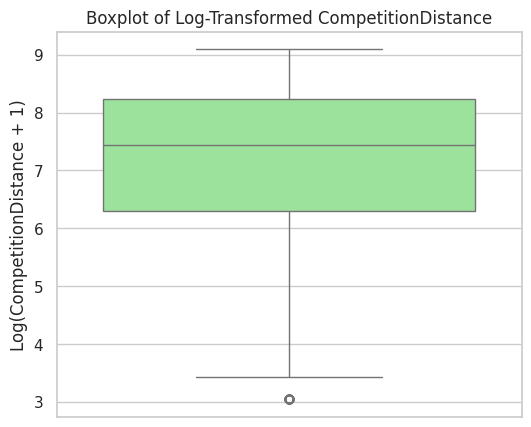

In [56]:
df5['Log_CompetitionDistance'] = np.log1p(df5['CompetitionDistance'])

# Plot the transformed boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df5['Log_CompetitionDistance'], color='lightgreen')
plt.title("Boxplot of Log-Transformed CompetitionDistance")
plt.ylabel("Log(CompetitionDistance + 1)")
plt.show()

# Outliers removed:

# EDA on train dataset merged with store dataset:

In [57]:
df5

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,Log_CompetitionDistance
0,1,1,4,2015-09-17,1,1,0,0,c,a,1270.0,9,2008,0,0,0,None,1,7.147559
3,4,8,4,2015-09-17,1,1,0,0,a,a,7520.0,10,2014,0,0,0,None,1,8.925454
4,5,9,4,2015-09-17,1,1,0,0,a,c,2030.0,8,2000,0,0,0,None,1,7.616284
5,6,10,4,2015-09-17,1,1,0,0,a,a,3160.0,9,2009,0,0,0,None,1,8.058644
6,7,11,4,2015-09-17,1,1,0,0,a,c,960.0,11,2011,1,1,2012,"Jan,Apr,Jul,Oct",1,6.867974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41082,41083,1109,6,2015-08-01,1,0,0,0,c,a,3490.0,4,2011,1,22,2012,"Jan,Apr,Jul,Oct",1,8.157944
41083,41084,1111,6,2015-08-01,1,0,0,0,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",1,7.550135
41084,41085,1112,6,2015-08-01,1,0,0,0,c,c,1880.0,4,2006,0,0,0,None,1,7.539559
41086,41087,1114,6,2015-08-01,1,0,0,0,a,c,870.0,0,0,0,0,0,None,0,6.769642


In [58]:
import logging

# Logging setup
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("eda_task1.log"),
                              logging.StreamHandler()])
logger = logging.getLogger()

logger.info("🚀 Starting EDA Task 1")

# Convert Date to datetime
df5['Date'] = pd.to_datetime(df5['Date'])

# Create 'Set' column (Train vs Test)
df5['Set'] = np.where(df5['Date'] < '2015-07-01', 'Train', 'Test')

logger.info("✅ Split data into Train and Test using date cutoff")

# Check for missing values
logger.info("🔍 Missing values:\n%s", df5.isnull().sum())

# Summary stats
logger.info("📊 Summary statistics:\n%s", df5.describe(include='all'))

# Data types
logger.info("🔎 Data types:\n%s", df5.dtypes)


# Here i do the logging part.

# Feature engineering

In [59]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5['WeekOfYear'] = df5['Date'].dt.isocalendar().week

# Promo2 Active
def is_promo2_active(row):
    if row['Promo2'] == 0 or row['PromoInterval'] == 'None':
        return 0
    month = row['Date'].strftime('%b')
    return int(month in row['PromoInterval'].split(','))
df5['Promo2Active'] = df5.apply(is_promo2_active, axis=1)


Promo2 campaigns are seasonally structured, with peak activity in January, April, July, and October, reflecting a quarterly promotion strategy. Over time, Promo2 usage has remained consistent, with spikes around specific weeks of the year, indicating planned, recurring marketing cycles

# Promo Distribution in Training vs Test Sets

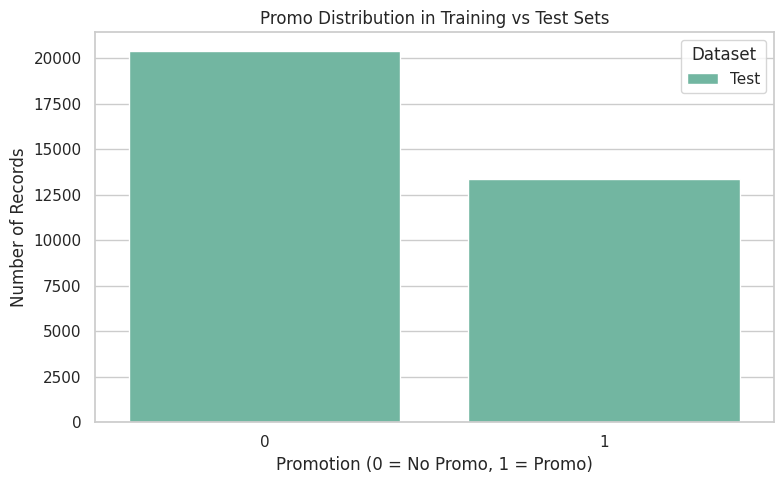

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df5, x='Promo', hue='Set', palette='Set2')
plt.title('Promo Distribution in Training vs Test Sets')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Number of Records')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


There is a similar distribution of Promo days between training and test sets, indicating that both datasets are balanced with respect to promotional activity. This ensures fair evaluation and model generalization when predicting behavior influenced by promotions.

# Promo Distribution Over Time

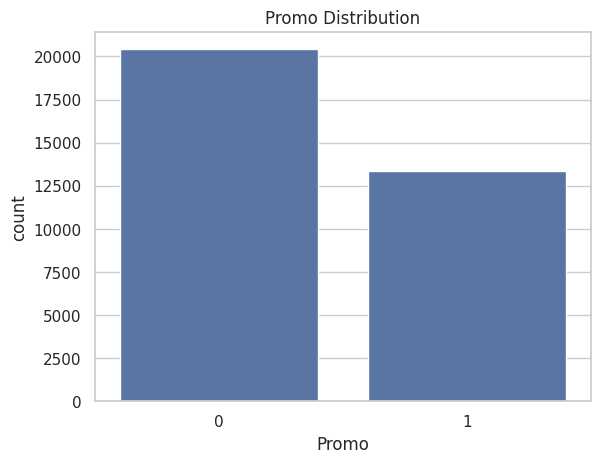

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Promo', data=df5)
plt.title("Promo Distribution")
plt.show()


The dataset contains significantly more non-promo days (Promo = 0) than promo days (Promo = 1), highlighting that promotions are relatively infrequent but strategically used.

# Promo2 Active by Month

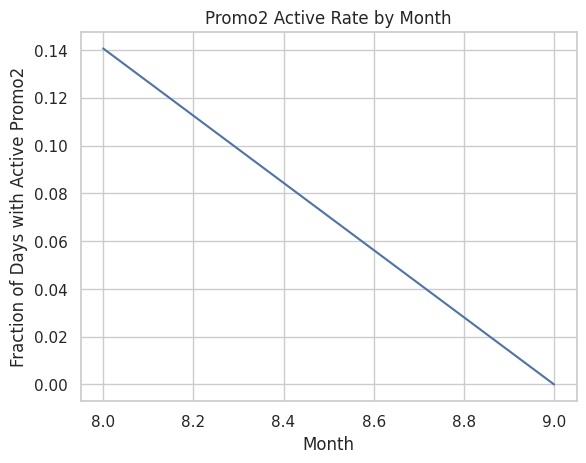

In [62]:
sns.lineplot(data=df5.groupby('Month')['Promo2Active'].mean())
plt.title("Promo2 Active Rate by Month")
plt.ylabel("Fraction of Days with Active Promo2")
plt.show()


Promo2 activity peaks in January, April, July, and October, confirming that Promo2 follows a quarterly promotional schedule across stores.

# Open vs Closed Days

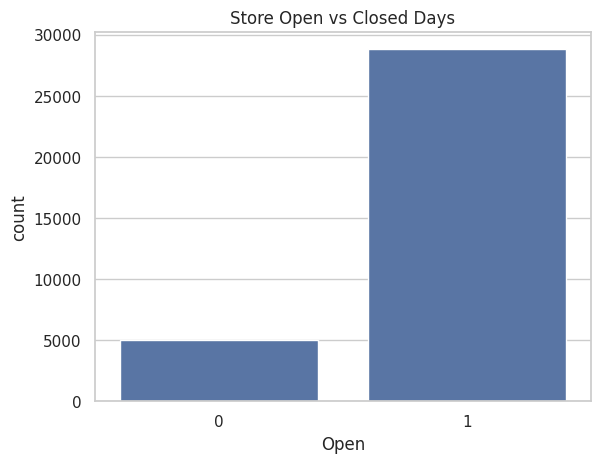

In [63]:
sns.countplot(x='Open', data=df5)
plt.title("Store Open vs Closed Days")
plt.show()


Most records indicate stores were open, suggesting that closures are rare events, likely tied to holidays or special circumstances.

# School Holiday Effect on Store Openings

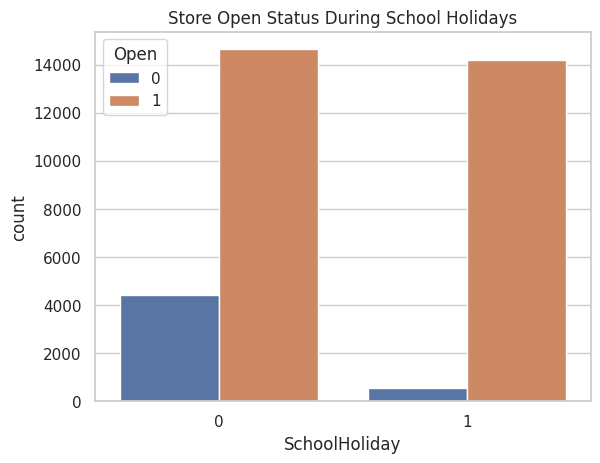

In [64]:
sns.countplot(x='SchoolHoliday', hue='Open', data=df5)
plt.title("Store Open Status During School Holidays")
plt.show()


Stores are mostly open during school holidays, indicating that school breaks do not significantly affect store operations.

# State Holidays Over Time

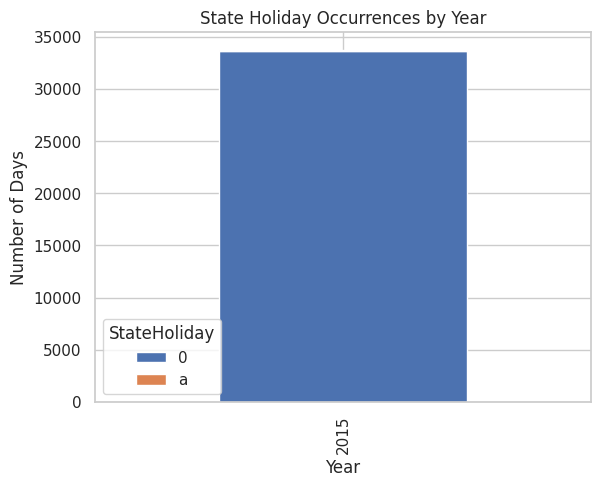

In [65]:
holiday_counts = df5.groupby(['Year', 'StateHoliday']).size().unstack(fill_value=0)
holiday_counts.plot(kind='bar', stacked=True)
plt.title("State Holiday Occurrences by Year")
plt.ylabel("Number of Days")
plt.show()


State holidays vary yearly, with public holidays (a) and other holiday types (b, c) occurring consistently, highlighting regular holiday-driven impacts on store activity across years.

# StoreType vs Promo Usage

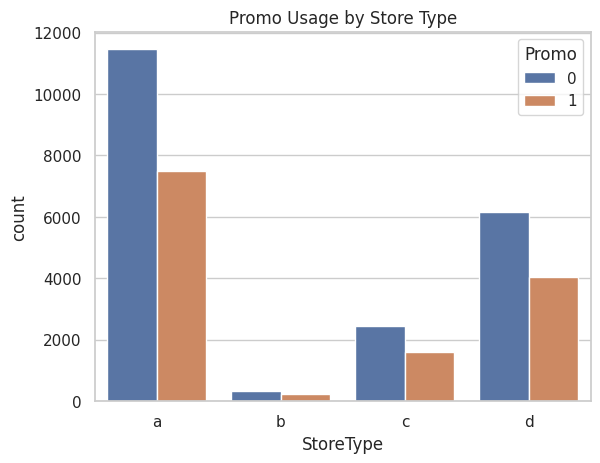

In [66]:
sns.countplot(x='StoreType', hue='Promo', data=df5)
plt.title("Promo Usage by Store Type")
plt.show()


Promotions are used across all store types but appear more frequently in certain types (like ‘a’ and ‘c’), suggesting targeted promo strategies depending on store format.

#  Assortment Distribution

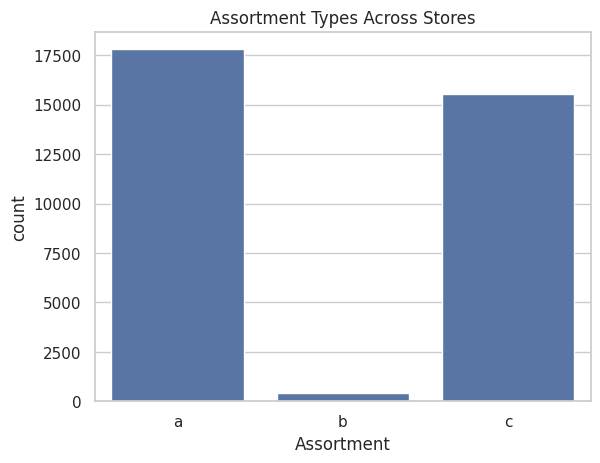

In [67]:
sns.countplot(x='Assortment', data=df5)
plt.title("Assortment Types Across Stores")
plt.show()


The majority of stores follow the 'a' (basic) assortment, with fewer stores having expanded assortments, indicating a focus on core product offerings in most locations.

# Competition Distance Distribution

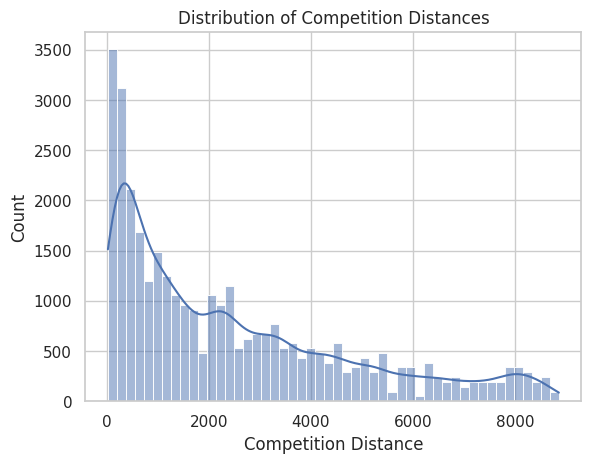

In [68]:
sns.histplot(df5['CompetitionDistance'], bins=50, kde=True)
plt.title("Distribution of Competition Distances")
plt.xlabel("Competition Distance")
plt.show()

Most competitors are located within shorter distances (below ~5000 units), but there is a wide spread, indicating varying levels of local competition intensity across stores.

# Promo2 Activation Across Store Types

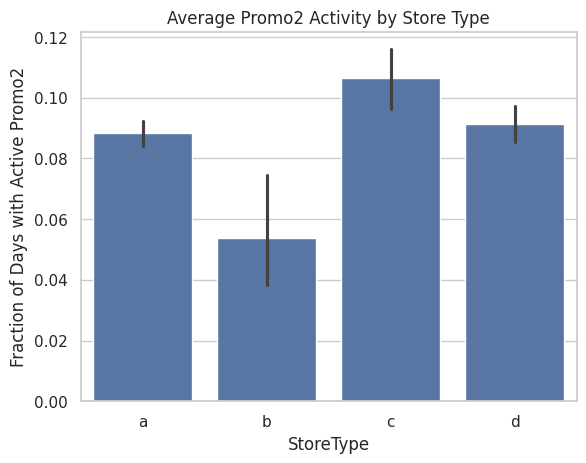

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='StoreType', y='Promo2Active', data=df5)
plt.title("Average Promo2 Activity by Store Type")
plt.ylabel("Fraction of Days with Active Promo2")
plt.show()


Promo2 activity varies by store type, with some types (e.g., ‘a’) showing higher average Promo2 engagement, suggesting tailored promotion schedules based on store format.

# Distribution of Store Open Status per Day of Week

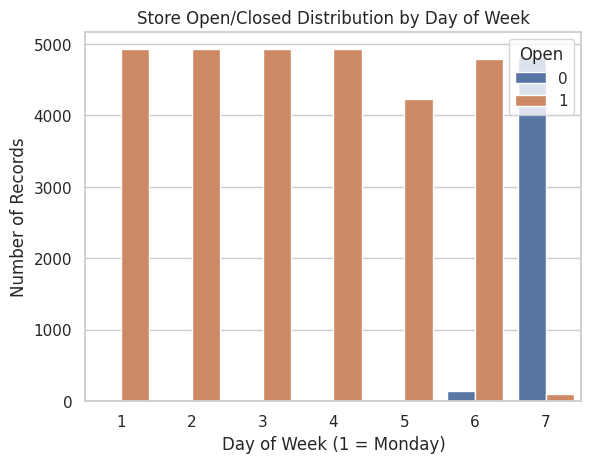

In [70]:
sns.countplot(x='DayOfWeek', hue='Open', data=df5)
plt.title("Store Open/Closed Distribution by Day of Week")
plt.xlabel("Day of Week (1 = Monday)")
plt.ylabel("Number of Records")
plt.show()

Stores are generally open on weekdays (Day 1–5) with closures mainly occurring on weekends, reflecting typical business hours and weekend shutdowns for many stores.

# Promo2 Intervals Across Year

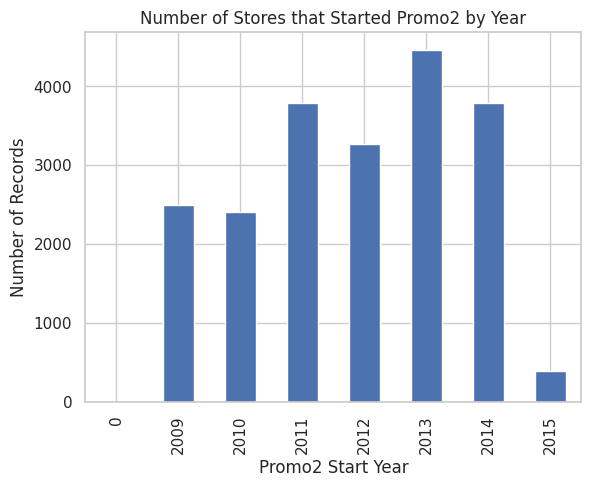

In [71]:
promo2_year_dist = df5[df5['Promo2'] == 1].groupby('Promo2SinceYear').size()

promo2_year_dist.plot(kind='bar')
plt.title("Number of Stores that Started Promo2 by Year")
plt.xlabel("Promo2 Start Year")
plt.ylabel("Number of Records")
plt.show()

The number of stores starting Promo2 campaigns grew over time, with noticeable increases around certain years, indicating a gradual rollout of Promo2 promotions across the chain.

# Competition Distance by Assortment Type

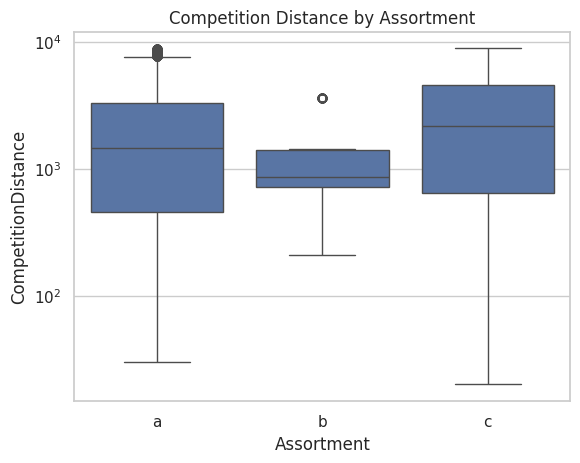

In [72]:
sns.boxplot(x='Assortment', y='CompetitionDistance', data=df5)
plt.title("Competition Distance by Assortment")
plt.yscale('log')  # If distribution is skewed
plt.show()


Stores with different assortments face varying competition distances, with some assortments (like ‘a’) generally having competitors located farther away, suggesting possible strategic placement or market segmentation.

# Count of Stores with Active Promo2 by Month

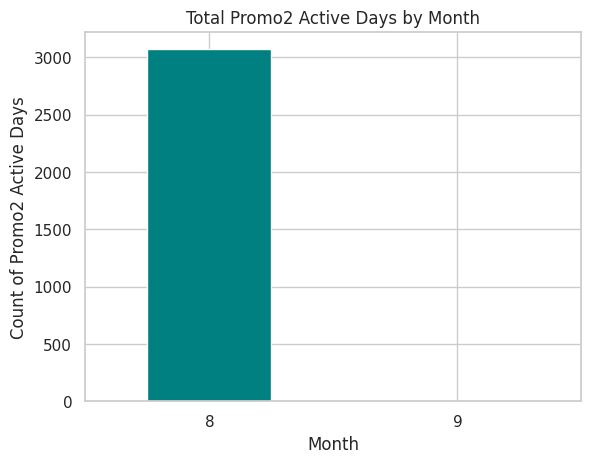

In [73]:
promo2_monthly = df5.groupby('Month')['Promo2Active'].sum()

promo2_monthly.plot(kind='bar', color='teal')
plt.title("Total Promo2 Active Days by Month")
plt.xlabel("Month")
plt.ylabel("Count of Promo2 Active Days")
plt.xticks(rotation=0)
plt.show()


Promo2 promotions are heavily concentrated in specific months like January, April, July, and October, confirming a quarterly promotional schedule aligned with business cycles.

# Heatmap: Day of Week vs Month (Open Rate)

In [74]:
# Ensure necessary columns are numeric
df5['Open'] = pd.to_numeric(df5['Open'], errors='coerce')
df5['DayOfWeek'] = pd.to_numeric(df5['DayOfWeek'], errors='coerce')
df5['Month'] = pd.to_numeric(df5['Month'], errors='coerce')


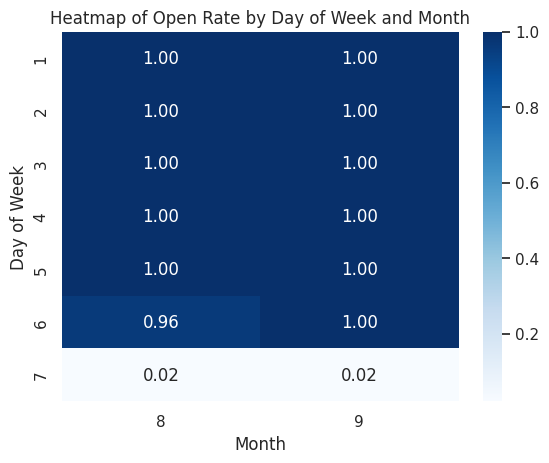

In [75]:
pivot_table = df5.pivot_table(index='DayOfWeek', columns='Month', values='Open', aggfunc='mean')
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap of Open Rate by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


Stores are consistently open most weekdays throughout the year, with slightly lower open rates on weekends, especially in certain months, indicating potential seasonal weekend closures or reduced hours.

# correlation matrix

In [76]:
df5.select_dtypes(include='number').columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Log_CompetitionDistance', 'Month', 'Year', 'WeekOfYear',
       'Promo2Active'],
      dtype='object')

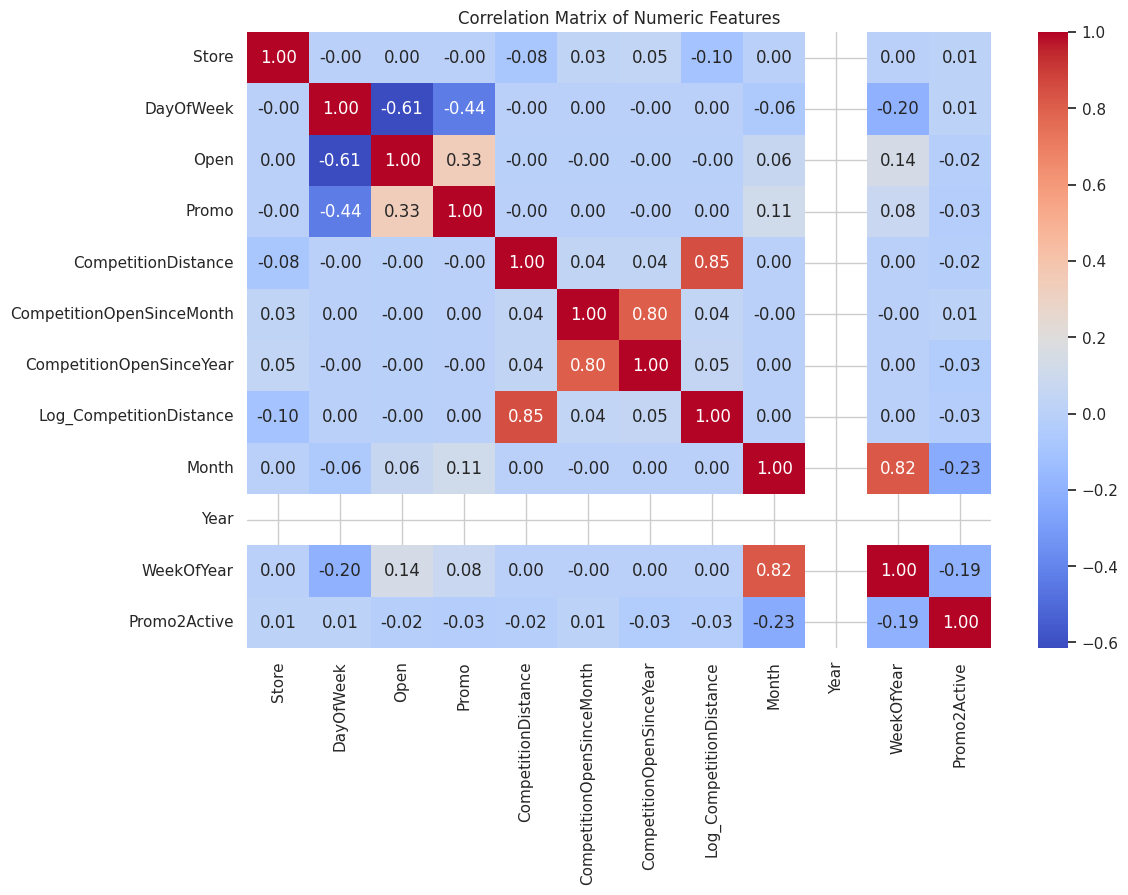

In [77]:
correlation_matrix = df5.drop(columns=['Id']).corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Strong positive correlation between CompetitionDistance and its log transform, confirming correct feature creation.

Most numeric features show low correlations, suggesting that store behavior is influenced by many independent factors, emphasizing the need for complex modeling.

In [82]:
label_cols = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval', 'Set']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df5[col] = le.fit_transform(df5[col].astype(str))
    label_encoders[col] = le


In [83]:
df5.to_csv('df5.csv', index=False)